<AxesSubplot:title={'center':'Vendas por ano\n'}, xlabel='Data Venda'>

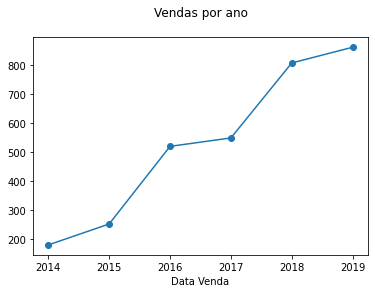

In [1]:
# Armstrong Lohãns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import matplotlib.patches as mpatches


dados = pd.read_csv("Vendas.csv", encoding = "iso-8859-1", sep = ";")

# Letra A

# Total de vendas por ano
# Dados agrupados pelo ano, no parametro do groupby() foi passado todos as datas, 
# que antes foi convertido para datetime para poder pegar o ano somente.
total_vendas_por_ano = dados.groupby(pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year).size()
total_vendas_por_ano.plot(marker="o", title="Vendas por ano\n")



<AxesSubplot:title={'center':'Vendas por categoria\n'}, xlabel='Categoria'>

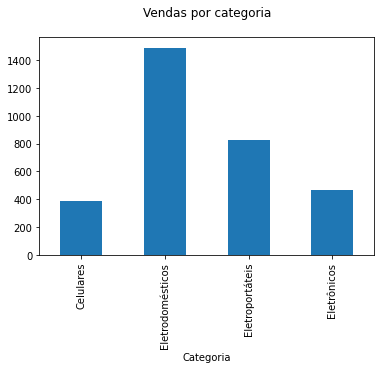

In [2]:
# Letra B

# Total de vendas por categoria
# Dados agrupados pela categoria, no parametro do groupby() foi passado todas as categorias, 
# e convertido para um gráfico em barra para melhor visualização.
total_vendas_por_categoria = dados.groupby(dados["Categoria"]).size()
total_vendas_por_categoria.plot(kind='bar', title="Vendas por categoria\n")


# dados.head()

<AxesSubplot:title={'center':'Vendas por categoria por ano\n'}, xlabel='Categoria'>

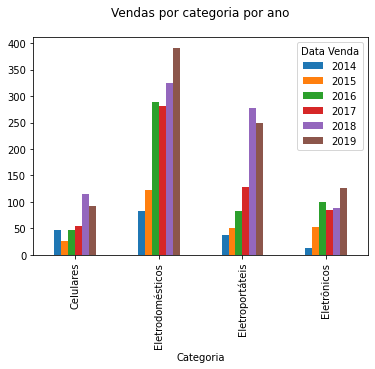

In [3]:
# Letra C

# Total de vendas por categoria por ano
# Dados agrupados pela categoria e por ano, no parametro do groupby() foram passados as duas colunas a serem analisadas, 
# e convertido para um gráfico em barra para melhor visualização,
# por fim, foi feito uma separação em cores/anos/categorias para ficar mais legível.
total_vendas_por_categoria_por_ano = dados.groupby([pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year, dados["Categoria"]]).size()
total_vendas_por_categoria_por_ano = total_vendas_por_categoria_por_ano.unstack(level=0).fillna(0)

total_vendas_por_categoria_por_ano.plot(kind='bar', title="Vendas por categoria por ano\n", )

# dados.head()

<AxesSubplot:title={'center':'Vendas por ano e categoria\n'}, xlabel='Data Venda'>

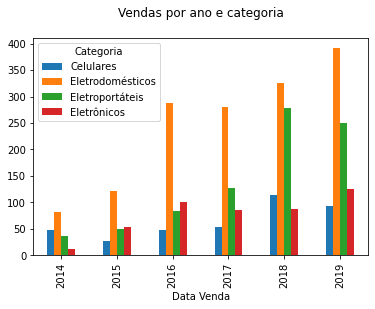

In [4]:
# Letra D

# Total de vendas por ano e categoria
# Dados agrupados pela categoria e por ano, no parametro do groupby() foram passados as duas colunas a serem analisadas, 
# e convertido para um gráfico em barra para melhor visualização,
# por fim, foi feito uma separação em cores/anos/categorias para ficar mais legível.
total_vendas_por_ano_e_categoria = dados.groupby([dados["Categoria"], pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year]).size()
total_vendas_por_ano_e_categoria = total_vendas_por_ano_e_categoria.unstack(level=0).fillna(0)

total_vendas_por_ano_e_categoria.plot(kind='bar', title="Vendas por ano e categoria\n", )

# dados.head()

<AxesSubplot:title={'center':'Vendas por categoria pelos meses para cada ano\n'}, ylabel='Categoria,Data Venda'>

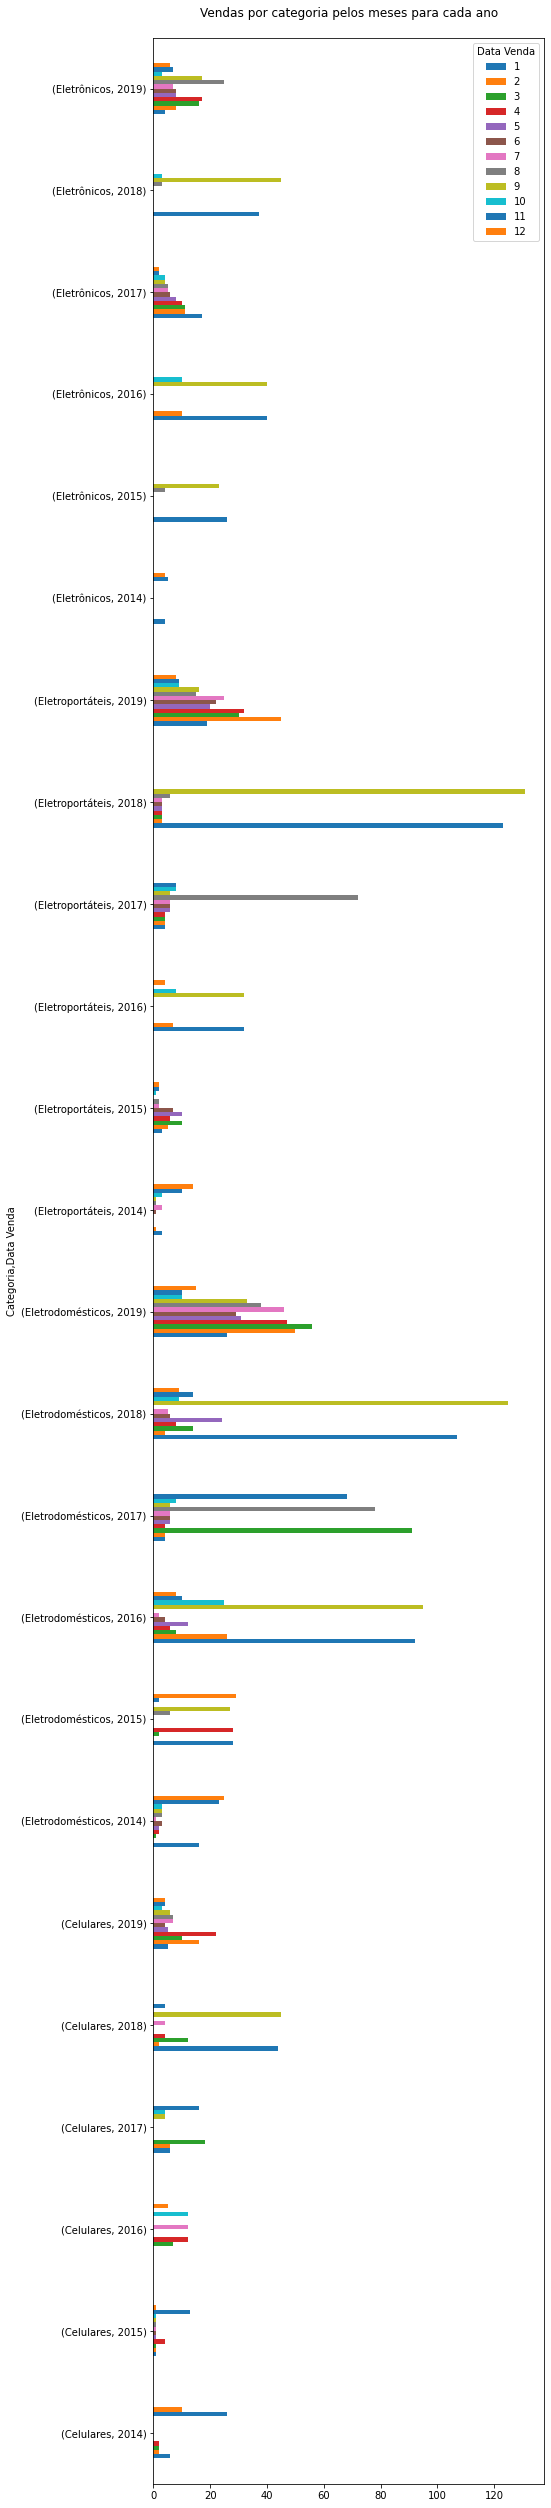

In [5]:
# Letra E

# Total de vendas por categoria pelos meses para cada ano
# Dados agrupados pela categoria e por ano e demonstrados por meses, no parametro do groupby() foram passados as duas colunas a serem analisadas, 
# e convertido para um gráfico em barra para melhor visualização,
# por fim, foi feito uma separação em cores/anos/meses/categorias para ficar mais legível.
total_vendas_por_categoria_pelos_meses_para_cada_ano = dados.groupby([dados["Categoria"], pd.to_datetime(dados["Data Venda"], errors='coerce').dt.month, pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year]).size()
total_vendas_por_categoria_pelos_meses_para_cada_ano = total_vendas_por_categoria_pelos_meses_para_cada_ano.unstack(level=1).fillna(0)

total_vendas_por_categoria_pelos_meses_para_cada_ano.plot(kind='barh', figsize= (7,45), title="Vendas por categoria pelos meses para cada ano\n")
# dados.head()



Produto mais vendido por cada fabricante:
                     Produto  Vendas  Fabricante
0                 Fritadeira   158.0        Arno
1           Geladeira Duplex   457.0    Brastemp
2                  Aspirador   413.0    Britânia
3           Geladeira Duplex   249.0      Consul
4         Notebook Dell 8 GB    65.0        Dell
5             Lavadora 11 Kg    33.0  Electrolux
6         Impressora Deskjet   118.0       Epson
7         Impressora Deskjet   194.0          HP
8            LG K10 TV Power     4.0          LG
9           Morotola Moto G5   207.0    Motorola
10               Micro-Ondas   127.0   Panasonic
11  Processador de Alimentos    68.0      Philco
12          Samsung Galaxy 8   160.0     Samsung
13           Sony Experia XA    14.0        Sony


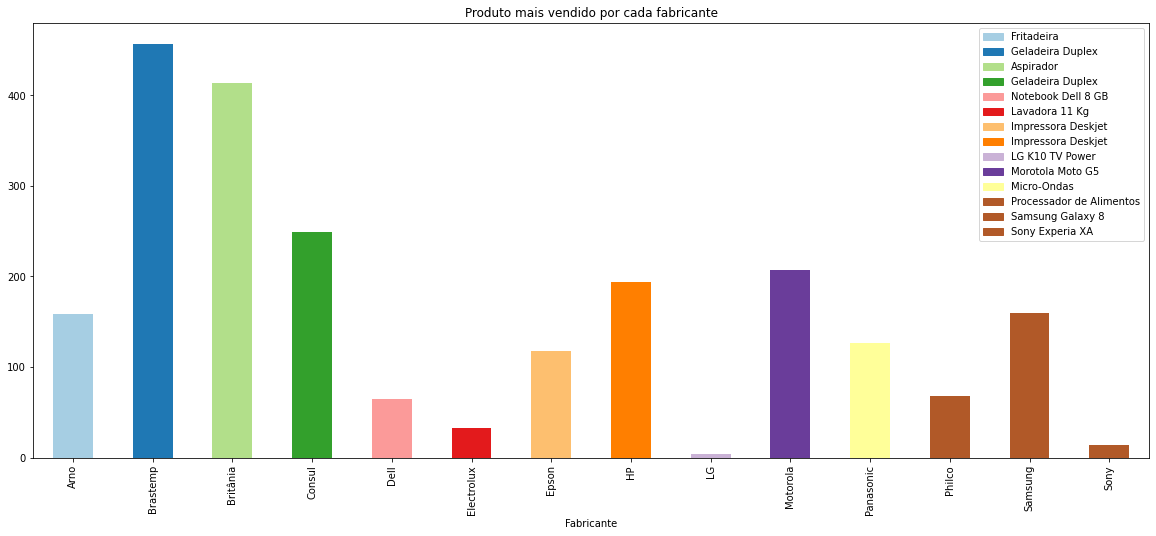

In [6]:
# Letra F

# Produto mais vendido por cada fabricante

import matplotlib.patches as mpatches
import numpy as np

produto_mais_vendido_por_fabricante = dados.groupby([dados["Produto"], dados["Fabricante"]]).size()


produto_mais_vendido_por_fabricante = produto_mais_vendido_por_fabricante.unstack(level=1).fillna(0)


# Separação de dados sobre produtos mais vendidos (sem quantidade)
produto_mais_vendido_por_fabricante_produtos = produto_mais_vendido_por_fabricante.idxmax()
df_produto_mais_vendido_por_fabricante_produtos = produto_mais_vendido_por_fabricante.idxmax().to_frame()

# Separação de dados sobre produtos mais vendidos (com quantidade, mas sem o nome dos produtos)
produto_mais_vendido_por_fabricante_total_vendas = produto_mais_vendido_por_fabricante.max()
df_produto_mais_vendido_por_fabricante_total_vendas = produto_mais_vendido_por_fabricante.max().to_frame()

# Junção de ambos
df_produto_mais_vendido_por_fabricante_produtos[1] = df_produto_mais_vendido_por_fabricante_total_vendas


lista = df_produto_mais_vendido_por_fabricante_produtos.values.tolist()

# Atualização nos indices do dataframe e atrinuição de cores únicas para legenda
nome_produtos = []
cores = plt.cm.Paired(np.arange(len(lista)))

for k in range(len(lista)):
    lista[k].append(produto_mais_vendido_por_fabricante_total_vendas.keys()[k])
    nome_produtos.append(mpatches.Patch(color=plt.cm.Paired(np.arange(len(lista)))[k], label=produto_mais_vendido_por_fabricante_produtos[k]))

# Finalização do dataframe
df_lista = pd.DataFrame(lista,columns=['Produto', 'Vendas', 'Fabricante'])

print("Produto mais vendido por cada fabricante:")

print(df_lista)

df_lista.plot(kind = 'bar', figsize= (20,8), use_index = True, x = 'Fabricante', color=[cores], title = 'Produto mais vendido por cada fabricante').legend(handles=nome_produtos)

<AxesSubplot:title={'center':'Vendas das lojas por categoria\n'}, xlabel='Categoria'>

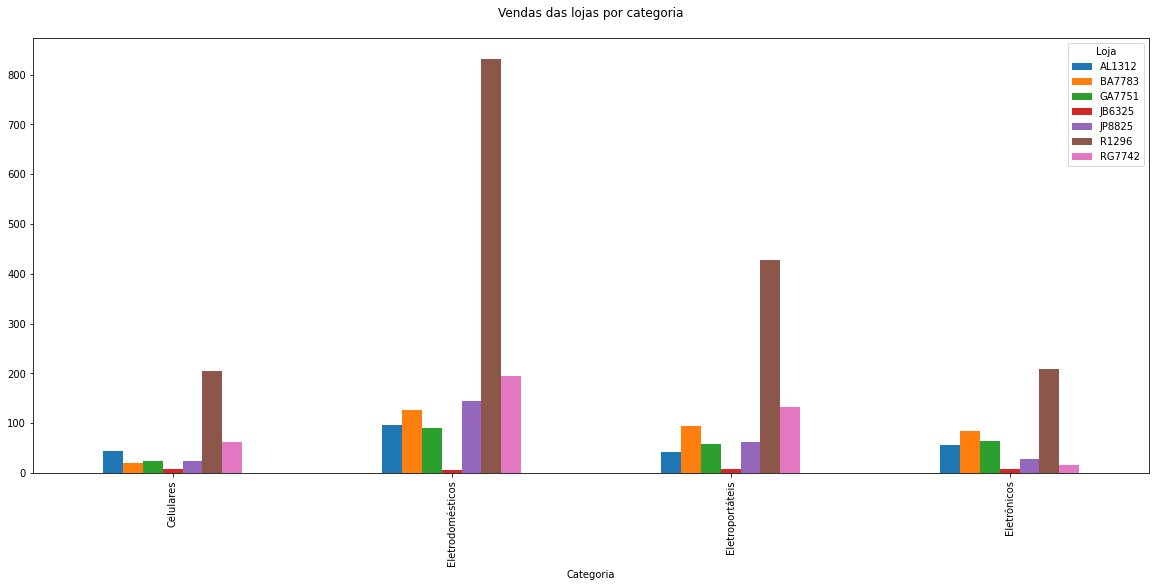

In [7]:
# Letra G

# Faça um gráfico das vendas das lojas por categoria

total_vendas_por_ano_e_categoria = dados.groupby([dados["Loja"], dados["Categoria"]]).size()
total_vendas_por_ano_e_categoria = total_vendas_por_ano_e_categoria.unstack(level=0).fillna(0)

total_vendas_por_ano_e_categoria.plot(kind='bar', figsize= (20,8), title="Vendas das lojas por categoria\n")


<AxesSubplot:title={'center':'Ranking de venda geral de produtos\n'}, xlabel='Produto'>

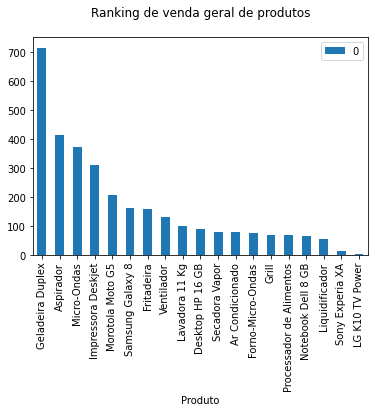

In [8]:
# Letra H (específico para estudo) - venda geral de produtos

# Faça um Ranking dos produtos com maiores vendas no geral e por loja

venda_geral = dados.groupby([dados["Produto"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=[0], ascending=False)

venda_geral.plot(kind= 'bar', title="Ranking de venda geral de produtos\n",)

<AxesSubplot:title={'center':'Ranking de venda geral por loja\n'}, xlabel='Loja'>

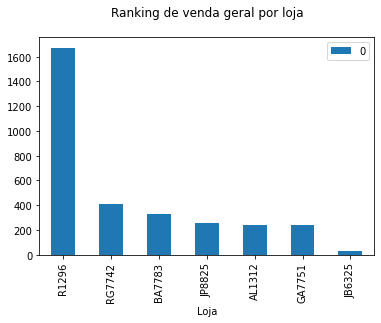

In [9]:
# Letra H (específico para estudo) - venda geral por loja

# Faça um Ranking dos produtos com maiores vendas no geral e por loja

venda_geral = dados.groupby([dados["Loja"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=[0], ascending=False)

venda_geral.plot(kind= 'bar', title="Ranking de venda geral por loja\n",)

Ranking dos produtos com maiores vendas no geral e por loja:
              Produto  Vendas    Loja
5    Geladeira Duplex   403.0   R1296
6         Micro-Ondas   127.0  RG7742
4    Geladeira Duplex    82.0  JP8825
1  Impressora Deskjet    78.0  BA7783
0    Geladeira Duplex    76.0  AL1312
2  Impressora Deskjet    56.0  GA7751
3  Notebook Dell 8 GB     7.0  JB6325


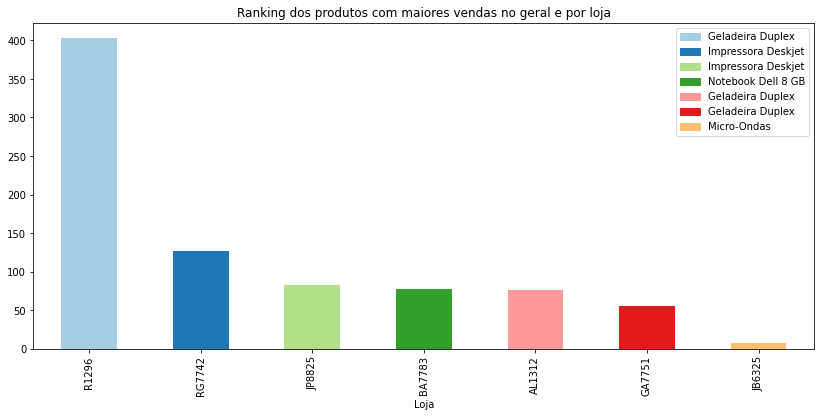

In [10]:
# Letra H

# Faça um Ranking dos produtos com maiores vendas no geral e por loja

import matplotlib.patches as mpatches
import numpy as np

venda_geral = dados.groupby([dados["Produto"], dados["Loja"]]).size()


venda_geral = venda_geral.unstack(level=1).fillna(0)


# Separação de dados sobre produtos mais vendidos (sem quantidade)
produto_mais_vendido_por_fabricante_produtos = venda_geral.idxmax()
df_produto_mais_vendido_por_fabricante_produtos = venda_geral.idxmax().to_frame()

# Separação de dados sobre produtos mais vendidos (com quantidade, mas sem o nome dos produtos)
produto_mais_vendido_por_fabricante_total_vendas = venda_geral.max()
df_produto_mais_vendido_por_fabricante_total_vendas = venda_geral.max().to_frame()

# Junção de ambos
df_produto_mais_vendido_por_fabricante_produtos[1] = df_produto_mais_vendido_por_fabricante_total_vendas


lista = df_produto_mais_vendido_por_fabricante_produtos.values.tolist()

# Criação de dados para legenda
nome_produtos = []
cores = plt.cm.Paired(np.arange(len(lista)))

# Atualização nos indices do dataframe e atribuição de cores únicas para legenda
for k in range(len(lista)):
    lista[k].append(produto_mais_vendido_por_fabricante_total_vendas.keys()[k])
    nome_produtos.append(mpatches.Patch(color=plt.cm.Paired(np.arange(len(lista)))[k], label=produto_mais_vendido_por_fabricante_produtos[k]))

# Finalização do dataframe
df_lista = pd.DataFrame(lista, columns=['Produto', 'Vendas', 'Loja'])
df_lista = df_lista.sort_values(by=['Vendas'], ascending=False) #Ordenação decrescente

print("Ranking dos produtos com maiores vendas no geral e por loja:")

print(df_lista)

df_lista.plot(kind = 'bar', figsize= (14,6), use_index = True, x = 'Loja', color=[cores], title = 'Ranking dos produtos com maiores vendas no geral e por loja').legend(handles=nome_produtos)

<AxesSubplot:title={'center':'Ranking de venda geral de produtos\n'}, xlabel='Produto'>

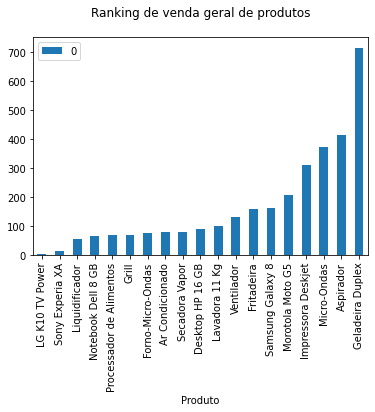

In [11]:
# Letra I (específico para estudo) - venda geral de produtos

# Faça um Ranking dos produtos com menores vendas no geral e por loja

venda_geral = dados.groupby([dados["Produto"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=[0], ascending=True)

venda_geral.plot(kind= 'bar', title="Ranking de venda geral de produtos\n",)

<AxesSubplot:title={'center':'Ranking de venda geral por loja\n'}, xlabel='Loja'>

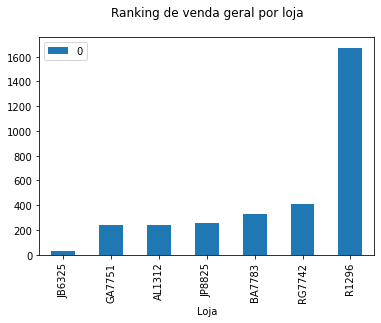

In [12]:
# Letra I (específico para estudo) - venda geral por loja

# Faça um Ranking dos produtos com menores vendas no geral e por loja

venda_geral = dados.groupby([dados["Loja"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=[0], ascending=True)

venda_geral.plot(kind= 'bar', title="Ranking de venda geral por loja\n",)

######### PRODUTOS COM VENDA 0 #########
                         0    1
Loja                          
AL1312  Forno-Micro-Ondas  0.0
BA7783  Forno-Micro-Ondas  0.0
GA7751    LG K10 TV Power  0.0
JB6325          Aspirador  0.0
JP8825    LG K10 TV Power  0.0
R1296     Sony Experia XA  0.0
RG7742   Desktop HP 16 GB  0.0



Ranking dos produtos com menores vendas no geral e por loja:
              Produto  Vendas    Loja
0     Ar Condicionado     2.0  AL1312
3    Geladeira Duplex     2.0  JB6325
4  Impressora Deskjet     2.0  JP8825
1    Desktop HP 16 GB     3.0  BA7783
2     Ar Condicionado     3.0  GA7751
6          Fritadeira     3.0  RG7742
5     LG K10 TV Power     4.0   R1296


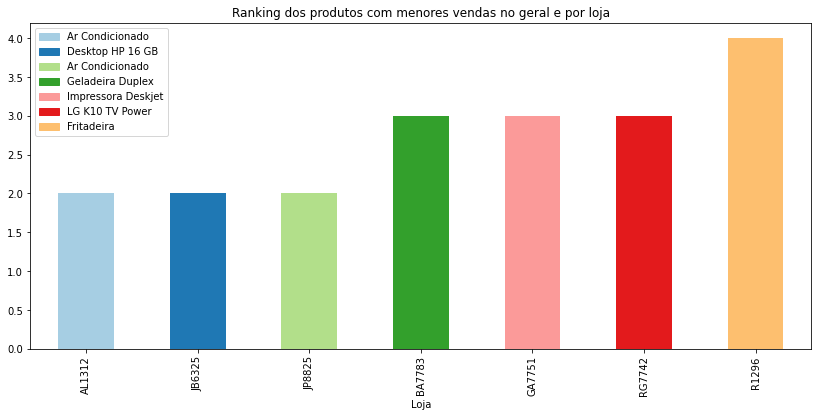

In [221]:
# Letra I

# Faça um Ranking dos produtos com menores vendas no geral e por loja

import matplotlib.patches as mpatches
import numpy as np

venda_geral = dados.groupby([dados["Produto"], dados["Loja"]]).size()


venda_geral = venda_geral.unstack(level=1).fillna(0)


######################## produtos com venda 0

# Separação de dados sobre produtos mais vendidos (sem quantidade)
com_zero_produto_mais_vendido_por_fabricante_produtos = venda_geral.idxmin()
df_com_zero_produto_mais_vendido_por_fabricante_produtos = venda_geral.idxmin().to_frame()

# Separação de dados sobre produtos mais vendidos (com quantidade, mas sem o nome dos produtos)
com_zero_produto_mais_vendido_por_fabricante_total_vendas = venda_geral.min()
df_com_zero_produto_mais_vendido_por_fabricante_total_vendas = venda_geral.min().to_frame()

# Junção de ambos
df_com_zero_produto_mais_vendido_por_fabricante_produtos[1] = df_com_zero_produto_mais_vendido_por_fabricante_total_vendas

print('######### PRODUTOS COM VENDA 0 #########\n',df_com_zero_produto_mais_vendido_por_fabricante_produtos)
print('\n\n')
######################## produtos com venda 0


# Na coleta dos valores foram removidos os produtos com venda 0 (para mostrar o gráfico dos produtos vendidos que venderam menos)

# Separação de dados sobre produtos mais vendidos (sem quantidade)
produto_mais_vendido_por_fabricante_produtos = venda_geral[venda_geral  > .01].idxmin()
df_produto_mais_vendido_por_fabricante_produtos = venda_geral[venda_geral  > .01].idxmin().to_frame()

# Separação de dados sobre produtos mais vendidos (com quantidade, mas sem o nome dos produtos)
produto_mais_vendido_por_fabricante_total_vendas = venda_geral[venda_geral  > .01].min()
df_produto_mais_vendido_por_fabricante_total_vendas = venda_geral[venda_geral  > .01].min().to_frame()


# Junção de ambos
df_produto_mais_vendido_por_fabricante_produtos[1] = df_produto_mais_vendido_por_fabricante_total_vendas


lista = df_produto_mais_vendido_por_fabricante_produtos.values.tolist()

# Criação de dados para legenda
nome_produtos = []
cores = plt.cm.Paired(np.arange(len(lista)))

# Atualização nos indices do dataframe e atrinuição de cores únicas para legenda
for k in range(len(lista)):
    lista[k].append(produto_mais_vendido_por_fabricante_total_vendas.keys()[k])
    nome_produtos.append(mpatches.Patch(color=plt.cm.Paired(np.arange(len(lista)))[k], label=produto_mais_vendido_por_fabricante_produtos[k]))

# Finalização do dataframe
df_lista = pd.DataFrame(lista, columns=['Produto', 'Vendas', 'Loja'])
df_lista = df_lista.sort_values(by=['Vendas'], ascending=True) #Ordenação crescente

print("Ranking dos produtos com menores vendas no geral e por loja:")

print(df_lista)

df_lista.plot(kind = 'bar', figsize= (14,6), use_index = True, x = 'Loja', color=[cores], title = 'Ranking dos produtos com menores vendas no geral e por loja').legend(handles=nome_produtos)


<AxesSubplot:title={'center':'Ranking dos produtos mais rentáveis no geral\n'}, ylabel='Lucro,Produto'>

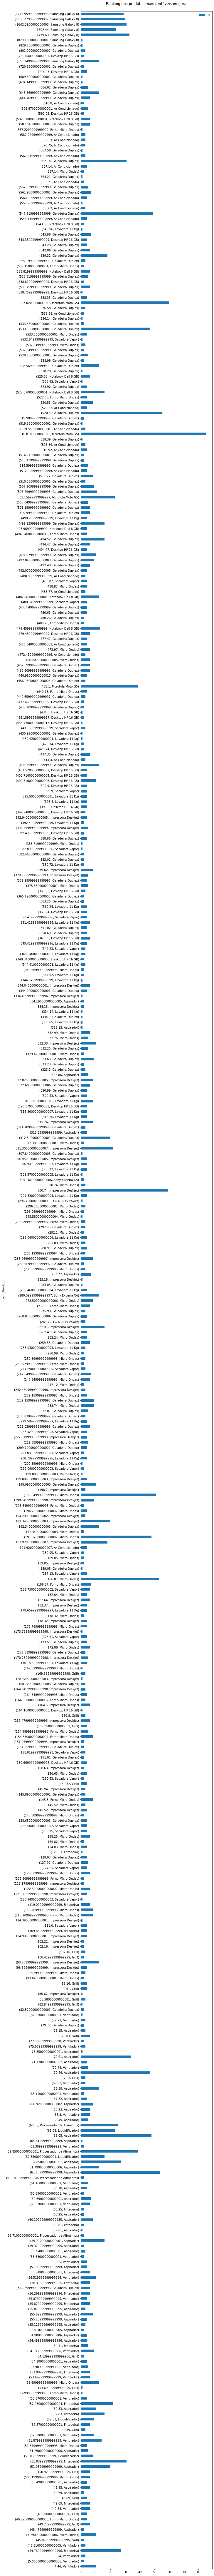

In [14]:
# Letra J (específico para estudo) - mais rentáveis no geral

# Faça um ranking dos produtos mais rentáveis no geral e por loja
dados["Lucro"] = dados.apply(lambda dados: float(dados["ValorVenda"].replace(',','.')) - float(dados["preço Custo"].replace(',','.')), axis=1)

venda_geral = dados.groupby([dados["Lucro"], dados["Produto"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=["Lucro"], ascending=True)

venda_geral.plot(kind= 'barh', figsize= (8,160), title="Ranking dos produtos mais rentáveis no geral\n",)

<AxesSubplot:title={'center':'Ranking dos produtos mais rentáveis por loja\n'}, ylabel='Lucro,Loja'>

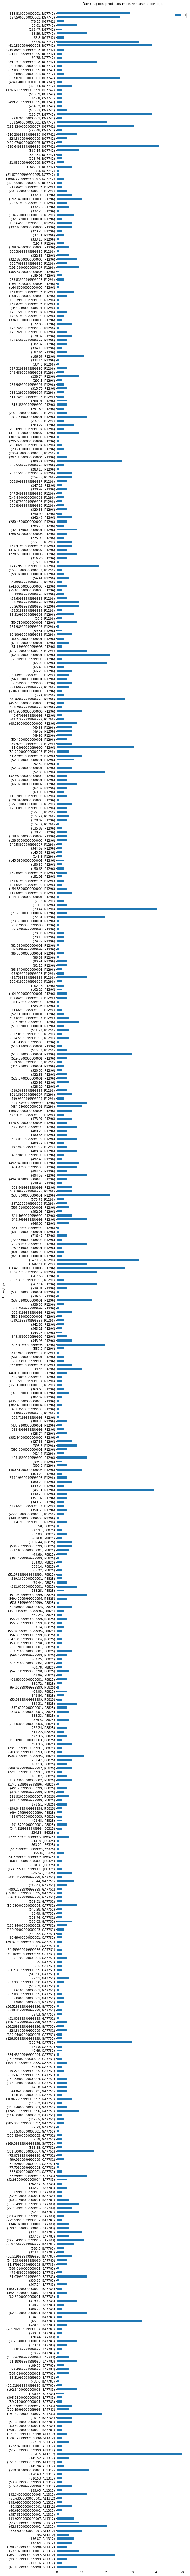

In [15]:
# Letra J (específico para estudo) - mais rentáveis por loja

# Faça um ranking dos produtos mais rentáveis no geral e por loja
dados["Lucro"] = dados.apply(lambda dados: float(dados["ValorVenda"].replace(',','.')) - float(dados["preço Custo"].replace(',','.')), axis=1)

venda_geral = dados.groupby([dados["Lucro"], dados["Loja"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=["Loja"], ascending=True)

venda_geral.plot(kind= 'barh', figsize= (8,160), title="Ranking dos produtos mais rentáveis por loja\n",)

Ranking dos produtos mais rentáveis no geral e por loja:
     Lucro    Loja             Produto
0   606.87  BA7783     Ar Condicionado
1   520.50  AL1312    Geladeira Duplex
2   300.74  GA7751  Impressora Deskjet
3   198.65  RG7742         Micro-Ondas
4  1479.63   R1296    Samsung Galaxy 8
5   182.73  JP8825      Secadora Vapor


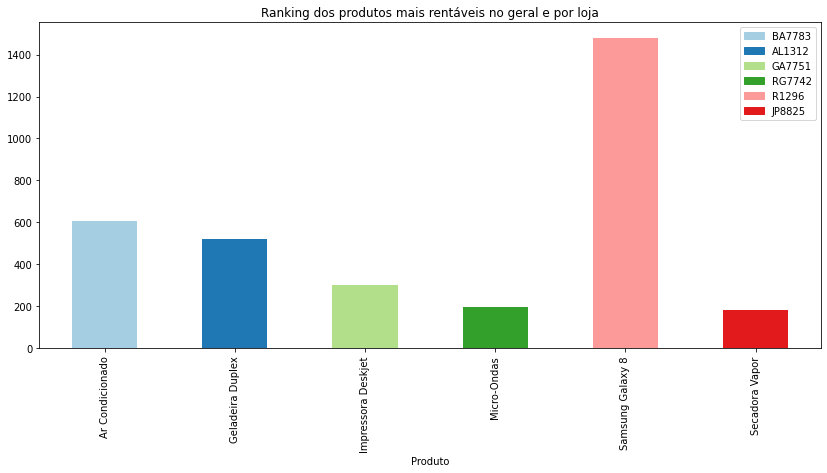

In [244]:
# Letra J

# Faça um ranking dos produtos mais rentáveis no geral e por loja

import matplotlib.patches as mpatches
import numpy as np

dados["Lucro"] = dados.apply(lambda dados: float(dados["ValorVenda"].replace(',','.')) - float(dados["preço Custo"].replace(',','.')), axis=1)

venda_geral = dados.groupby([dados["Lucro"], dados["Produto"], dados["Loja"]]).size()


venda_geral = venda_geral.unstack(level=1).fillna(0)

# Separação de dados sobre produtos mais vendidos (sem quantidade)
produto_mais_rentavel_produtos = venda_geral.idxmax()
df_produto_mais_rentavel_produtos = venda_geral.idxmax().to_frame()

df_produto_mais_rentavel_produtos

# Separação de dados sobre produtos mais vendidos (com quantidade, mas sem o nome dos produtos)
produto_mais_rentavel_total_vendas = venda_geral.max()
df_produto_mais_rentavel_total_vendas = venda_geral.max().to_frame()

# Junção de ambos
df_produto_mais_rentavel_produtos[1] = df_produto_mais_rentavel_total_vendas

lista = df_produto_mais_rentavel_produtos.values.tolist()

# print('aaa -> ', produto_mais_rentavel_produtos)


# Atualização nos indices do dataframe
for k in range(len(lista)):
    lista[k][1] = lista[k][0][1] #Atribuindo o nome da loja
    lista[k][0] = float("{:.2f}".format(lista[k][0][0])) #Atribuindo o lucro da venda
    lista[k].append(produto_mais_rentavel_total_vendas.keys()[k]) #Atribuindo o nome do produto
    

# REMOÇÃO DE PRODUTOS QUE RENDERAM MENOS PARA UMA MESMA LOJA:
lista_copia = lista.copy()

# Remoção das vendas menos rentáveis
for k in range(len(lista)):    
    for i in range(len(lista)):
#         print('iteração ', i)
#         print('lista[k] => ', lista[k])
#         print('lista[i] => ', lista[i])
#         print('\n')
        
        if(lista[k][1] == lista[i][1] and lista[k][0] > lista[i][0]):
            if lista[i] in lista_copia:
                lista_copia.remove(lista[i])


# Criação de dados para legenda
nome_loja = []
cores = plt.cm.Paired(np.arange(len(lista)))

for k in range(len(lista_copia)):
    nome_loja.append(mpatches.Patch(color=plt.cm.Paired(np.arange(len(lista_copia)))[k], label=lista_copia[k][1]))

            
# Finalização do dataframe
df_lista = pd.DataFrame(lista_copia, columns=['Lucro', 'Loja', 'Produto'])
df_lista = df_lista.sort_index(ascending=True) #Ordenação decrescente


print("Ranking dos produtos mais rentáveis no geral e por loja:")

print(df_lista)

df_lista.plot(kind = 'bar', figsize= (14,6), use_index = True, x = 'Produto', color=[cores], title = 'Ranking dos produtos mais rentáveis no geral e por loja').legend(handles=nome_loja)


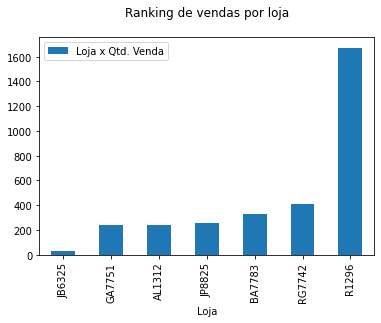

In [184]:
# Letra K

# Faça um ranking de vendas por lojas

venda_geral = dados.groupby([dados["Loja"]]).size()

venda_geral = venda_geral.to_frame().sort_values(by=[0], ascending=True)

venda_geral.plot(kind= 'bar', title="Ranking de vendas por loja\n",).legend(labels = ["Loja x Qtd. Venda"])

Ranking dos vendedores com maior valor de vendas por loja e ano


Data Venda
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

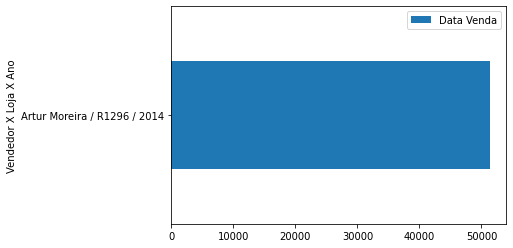

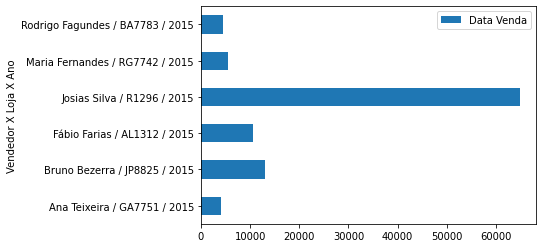

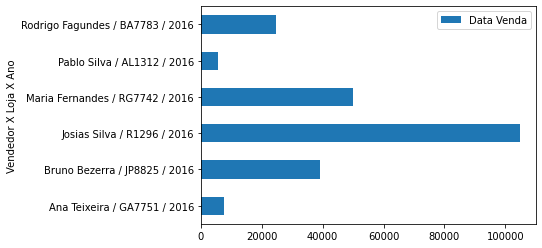

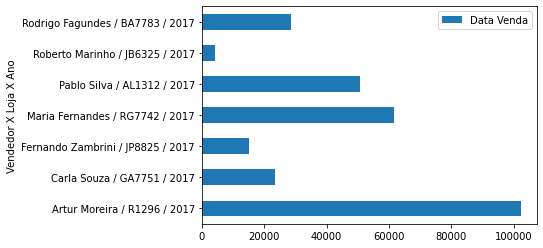

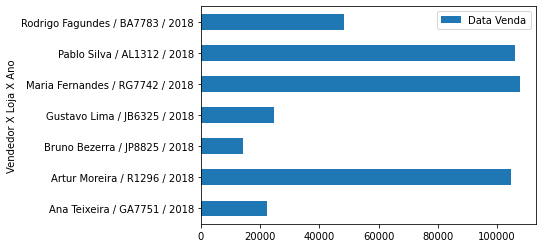

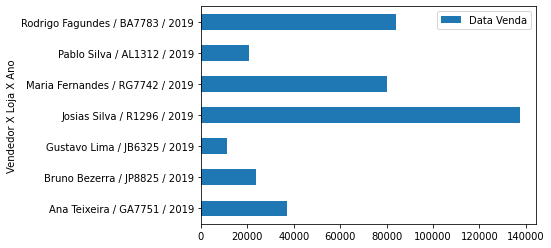

In [211]:
# Letra L

# Faça um ranking dos vendedores com maior valor de vendas por loja e ano
dados["Valor"] = dados.apply(lambda dados: float(dados["ValorVenda"].replace(',','.')), axis=1)
dados.groupby([(pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year), dados['Vendedor']])['Valor'].sum()

print('Ranking dos vendedores com maior valor de vendas por loja e ano:')


venda_geral = dados.groupby([(pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year), dados['Vendedor']])['Valor'].sum()


venda_geral2 = dados.groupby([(pd.to_datetime(dados["Data Venda"], errors='coerce').dt.year), dados['Vendedor'], dados['Loja']], as_index=False)['Valor'].size()

venda_geral2['ValorTotal'] = venda_geral.values

del venda_geral2['size']

lista = venda_geral2.values.tolist()

# Criação de dados para legenda
anos = []
cores = plt.cm.Paired(np.arange(len(lista)))

ano_atual = 0
cor_atual = plt.cm.Paired(np.arange(1))


# Atualização nos indices do dataframe
for k in range(len(lista)):
    lista[k][3] = float("{:.2f}".format(lista[k][3])) #Conversão pra float .2
    
    
    if(ano_atual != lista[k][0]):
        ano_atual = lista[k][0]
        cor_atual = plt.cm.Paired(np.arange(len(lista)))[k]
        anos.append(mpatches.Patch(color=plt.cm.Paired(np.arange(len(lista)))[k], label=lista[k][0]))
    else:
        anos.append(mpatches.Patch(color=cor_atual, label=ano_atual))
        
# REMOÇÃO DE PRODUTOS QUE RENDERAM MENOS PARA UMA MESMA LOJA:
lista_copia = lista.copy()

# Remoção das vendas menos rentáveis
for k in range(len(lista)):    
    for i in range(len(lista)):
        
        if(lista[k][0] == lista[i][0] and lista[k][2] == lista[i][2] and lista[k][3] > lista[i][3]):
            if lista[i] in lista_copia:
                lista_copia.remove(lista[i])


# Finalização do dataframe

df_lista_copia = pd.DataFrame(lista_copia, columns=['Data Venda', 'Vendedor', 'Loja', 'ValorTotal'])

df_lista_copia["Vendedor X Loja X Ano"] = df_lista_copia["Vendedor"].astype(str) + ' / ' + df_lista_copia["Loja"].astype(str) + ' / ' + df_lista_copia['Data Venda'].astype(str)

df_lista_copia

df_lista_copia.groupby('Data Venda').plot(x = "Vendedor X Loja X Ano", y=["ValorTotal"], kind='barh', label=['Data Venda'])



In [229]:
print('a) Quais possíveis produtos de fabricantes poderiam ser descartados para venda?\n')
print('R: Produtos com venda 0, alé dos que menos vendem como mostrado no gráfico da letra I.')
print('Exemplo: AL1312 - Forno-Micro-Ondas (0 vendas) \n/ BA7783 - Forno-Micro-Ondas (0 vendas) \n/ GA7751 - LG K10 TV Power (0 vendas) \n/ JB6325 - Aspirador (0 vendas) \n/ JP8825 - LG K10 TV Power (0 vendas) \n/ R1296 - Sony Experia XA (0 vendas) \n/ RG7742 - Desktop HP 16 GB (0 vendas)')

a) Quais possíveis produtos de fabricantes poderiam ser descartados para venda?

R: Produtos com venda 0, alé dos que menos vendem como mostrado no gráfico da letra I
Exemplo: AL1312 - Forno-Micro-Ondas (0 vendas) 
/ BA7783 - Forno-Micro-Ondas (0 vendas) 
/ GA7751 - LG K10 TV Power (0 vendas) 
/ JB6325 - Aspirador (0 vendas) 
/ JP8825 - LG K10 TV Power (0 vendas) 
/ R1296 - Sony Experia XA (0 vendas) 
/ RG7742 - Desktop HP 16 GB (0 vendas)


In [245]:
print('b) Quais os possíveis fabricantes e produtos que poderiam ser negociados melhores preços de compras dos produtos?\n')
print('R: Produtos que foram vendidos a preço de custo, com o menor lucro possível.')

b) Quais os possíveis fabricantes e produtos que poderiam ser negociados melhores preços de compras dos produtos?

R: Produtos que foram vendidos a preço de custo, com o menor lucro possível


In [230]:
print('FEITO POR ARMSTRONG LOHÃNS DE MELO GOMES QUINTINO')
print('FUNDAMENTOS EM CIÊNCIA DE DADOS - BCC - UFAPE - 2020.1')
print('22/05/2021')

FEITO POR ARMSTRONG LOHÃNS DE MELO GOMES QUINTINO
FUNDAMENTOS EM CIÊNCIA DE DADOS - BCC - UFAPE - 2020.1
22/05/2021
